In [ ]:
print("hello")

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

100%|██████████| 3.60k/3.60k [00:00<00:00, 5.53MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/uciml/iris/versions/2


In [5]:
import os
import pandas as pd
iris_df = pd.read_csv(os.path.join(path, 'Iris.csv')) # Use 'path' instead of 'dataset_path'
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into features and target
X = iris_df.drop('Species', axis=1)  # Features (all columns except 'target') use iris_df instead of Iris_data
y = iris_df['Species']  # Target (the 'target' column) use iris_df instead of Iris_data

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (RBF networks perform better with standardized data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
import numpy as np

# Gaussian RBF Kernel Function
def rbf_kernel(X, X_train, gamma=0.5):
    # Compute the pairwise squared Euclidean distance
    sq_dists = np.sum(X**2, axis=1).reshape(-1, 1) + np.sum(X_train**2, axis=1) - 2 * np.dot(X, X_train.T)
    return np.exp(-gamma * sq_dists)


In [9]:
from sklearn.cluster import KMeans

# Number of RBF centers (set this based on the number of classes or as a hyperparameter)
num_centers = 3  # The Iris dataset has 3 classes

# Apply k-means to find the centers
kmeans = KMeans(n_clusters=num_centers, random_state=42)
kmeans.fit(X_train)

# RBF transformation of the input data using the centers found by k-means
def rbf_transform(X, centers, gamma=0.5):
    # Calculate pairwise squared distances from each point to each center
    return np.exp(-gamma * np.linalg.norm(X[:, None] - centers, axis=2)**2)

# Transform the training and test data using the RBF centers
X_train_rbf = rbf_transform(X_train, kmeans.cluster_centers_)
X_test_rbf = rbf_transform(X_test, kmeans.cluster_centers_)


In [10]:
from sklearn.linear_model import LogisticRegression

# Train a logistic regression classifier on the RBF-transformed training data
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_rbf, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test_rbf)


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RBF Network: {accuracy:.4f}")

# Additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of RBF Network: 1.0000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [12]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Train an SVM with RBF kernel
svm_clf = SVC(kernel='rbf', gamma='scale')
svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

# Train a RandomForest classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Compare the performance of all models
print(f"Accuracy of RBF Network: {accuracy_score(y_test, y_pred):.4f}")
print(f"Accuracy of SVM: {accuracy_score(y_test, svm_pred):.4f}")
print(f"Accuracy of Random Forest: {accuracy_score(y_test, rf_pred):.4f}")


Accuracy of RBF Network: 1.0000
Accuracy of SVM: 1.0000
Accuracy of Random Forest: 1.0000


RBF Network Accuracy: 1.0000
KRITHIKA: Classification Report for RBF Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

KNN Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
SVM Accuracy: 1.0000


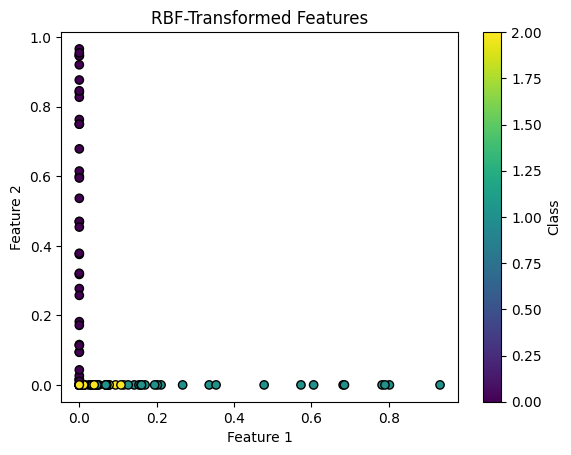

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def rbf_kernel(X, centers, sigma):

    n_samples, n_features = X.shape
    n_centers = centers.shape[0]
    rbf_features = np.zeros((n_samples, n_centers))
    for i in range(n_centers):
        rbf_features[:, i] = np.exp(-np.linalg.norm(X - centers[i], axis=1) ** 2 / (2 * sigma ** 2))
    return rbf_features

n_centers = 13
kmeans = KMeans(n_clusters=n_centers, random_state=42, n_init=10)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_
sigma = np.mean([np.linalg.norm(centers[i] - centers[j]) for i in range(n_centers) for j in range(n_centers) if i != j]) / np.sqrt(2 * n_centers)
X_train_rbf = rbf_kernel(X_train, centers, sigma)
X_test_rbf = rbf_kernel(X_test, centers, sigma)

rbf_classifier = LogisticRegression()
rbf_classifier.fit(X_train_rbf, y_train)

rbf_predictions = rbf_classifier.predict(X_test_rbf)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print(f"RBF Network Accuracy: {rbf_accuracy:.4f}")
print("KRITHIKA: Classification Report for RBF Network:")
print(classification_report(y_test, rbf_predictions))


models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

plt.scatter(X_train_rbf[:, 0], X_train_rbf[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("RBF-Transformed Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.show()

RBF Network Accuracy: 0.9667

Classification Report for RBF Network:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

KNN Accuracy: 1.0000
Decision Tree Accuracy: 1.0000
SVM Accuracy: 1.0000


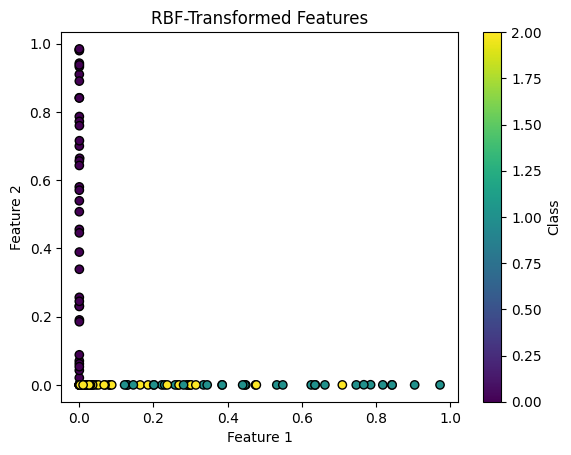

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

data = load_iris()
X, y = data.data, data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def rbf_kernel(X, centers, sigma):
    n_samples, n_features = X.shape
    n_centers = centers.shape[0]
    rbf_features = np.zeros((n_samples, n_centers))
    for i in range(n_centers):
        rbf_features[:, i] = np.exp(-np.linalg.norm(X - centers[i], axis=1) ** 2 / (2 * sigma ** 2))
    return rbf_features

n_centers = 10
kmeans = KMeans(n_clusters=n_centers, random_state=42, n_init=10)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_

sigma = np.mean([np.linalg.norm(centers[i] - centers[j]) for i in range(n_centers) for j in range(n_centers) if i != j]) / np.sqrt(2 * n_centers)
X_train_rbf = rbf_kernel(X_train, centers, sigma)
X_test_rbf = rbf_kernel(X_test, centers, sigma)

rbf_classifier = LogisticRegression()
rbf_classifier.fit(X_train_rbf, y_train)

rbf_predictions = rbf_classifier.predict(X_test_rbf)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print(f"RBF Network Accuracy: {rbf_accuracy:.4f}")
print("\nClassification Report for RBF Network:")
print(classification_report(y_test, rbf_predictions))

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")

plt.scatter(X_train_rbf[:, 0], X_train_rbf[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.title("RBF-Transformed Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class")
plt.show()
